In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


# 1. Import Libraries
**Import necessary libraries (pandas, numpy, matplotlib, seaborn, scikit-learn, etc.).******

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats


# 2. Load and Explore Dataset
**Load the dataset and display basic properties (shape, data types, etc.).
Describe the meaning of each feature/column.******


In [78]:
df =pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [79]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [80]:
df.shape

(2930, 82)

In [81]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# 3. Check for Missing Values
**Identify missing values in the dataset.
Visualize missing data using a heatmap.******


In [83]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [84]:
df.isnull().sum()/len(df)*100

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64

In [85]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [86]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


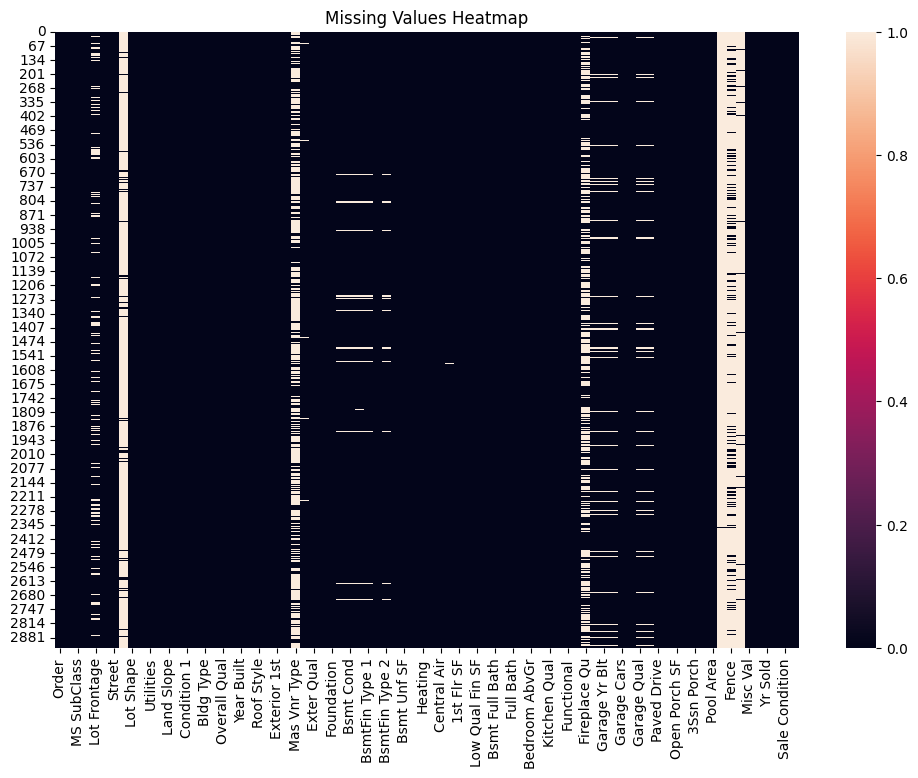

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull())
plt.title('Missing Values Heatmap')
plt.show()

# 4. Analyze Null and Unique Values
**Identify columns with null values.
Analyze the number of unique values in each column.******


In [88]:
null_columns = df.columns[df.isnull().any()]
print("Columns with Null Values:")
print(null_columns)



Columns with Null Values:
Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


In [89]:
unique_values = df.nunique()
print("Number of Unique Values in Each Column:")
print(unique_values)


Number of Unique Values in Each Column:
Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64


# 5. Detect and Handle Duplicated Values
****Check for duplicated rows in the dataset.
Remove duplicates if found.****


In [90]:
duplicates = df.duplicated().sum()
print(duplicates)


0


# 6. Impute Missing Values
**Handle missing values using mean, median, or mode based on the nature of the column******.


In [91]:
df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0], inplace=True)

df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), inplace=True)

df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean(), inplace=True)

df.isnull().sum()


/tmp/ipykernel_36/3863507011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0], inplace=True)
/tmp/ipykernel_36/3863507011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

# 7. Perform Data Binning
****Create bins for continuous variables (e.g., SalePrice, LotArea)****

In [92]:
bins_saleprice = [0, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000]
labels_saleprice = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-400k', '400k+']
df['SalePrice_Bin'] = pd.cut(df['SalePrice'], bins=bins_saleprice, labels=labels_saleprice)

bins_lotarea = [0, 5000, 10000, 15000, 20000, 25000]
labels_lotarea = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k']
df['LotArea_Bin'] = pd.cut(df['Lot Area'], bins=bins_lotarea, labels=labels_lotarea)


In [93]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,SalePrice_Bin,LotArea_Bin
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,200k-250k,NaN
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,100k-150k,10k-15k
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,150k-200k,10k-15k
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,200k-250k,10k-15k
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,150k-200k,10k-15k


# 9. Data Filtering
**Remove irrelevant columns or rows that don't contribute to the analysis.******


In [94]:
drop_columns = df.drop(columns=['PID', 'Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'])
drop_columns = drop_columns.dropna(subset=['SalePrice'])
drop_columns.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Condition,SalePrice,SalePrice_Bin,LotArea_Bin
0,1,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,5,2010,Normal,215000,200k-250k,NaN
1,2,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,Normal,105000,100k-150k,10k-15k
2,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,Normal,172000,150k-200k,10k-15k
3,4,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,4,2010,Normal,244000,200k-250k,10k-15k
4,5,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,Normal,189900,150k-200k,10k-15k


# 10. Detect Outliers
**Detect outliers using methods like boxplots, Z-score, or IQR.******


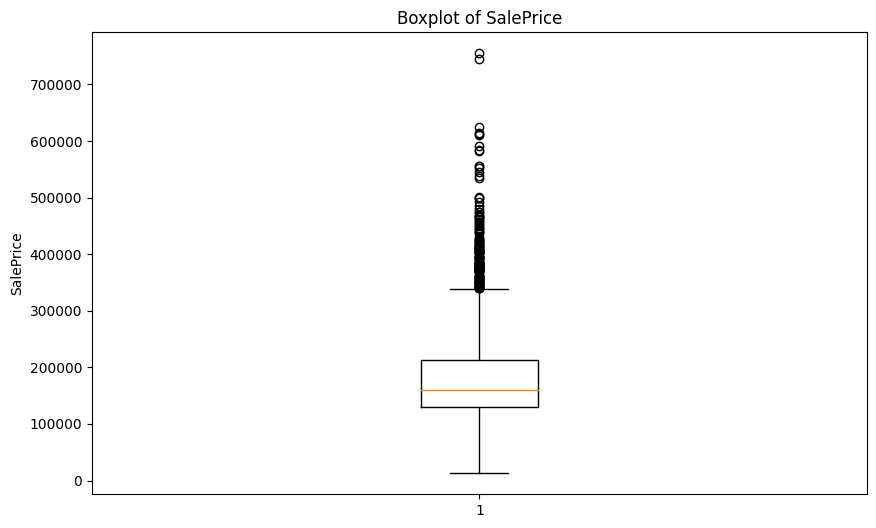

In [95]:
# Boxplot for SalePrice
plt.figure(figsize=(10, 6))
plt.boxplot(df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

# 11. Handle Outliers
**Remove or handle outliers effectively to improve data quality.******


In [96]:

z_scores = stats.zscore(df['SalePrice'])
abs_z_scores = np.abs(z_scores)
threshold = 3
outliers_z = df[abs_z_scores > threshold]
outliers_z.shape[0]


45

In [97]:
df_cleaned_z = df[abs_z_scores <= threshold]

df_cleaned_z.shape[0]

2885

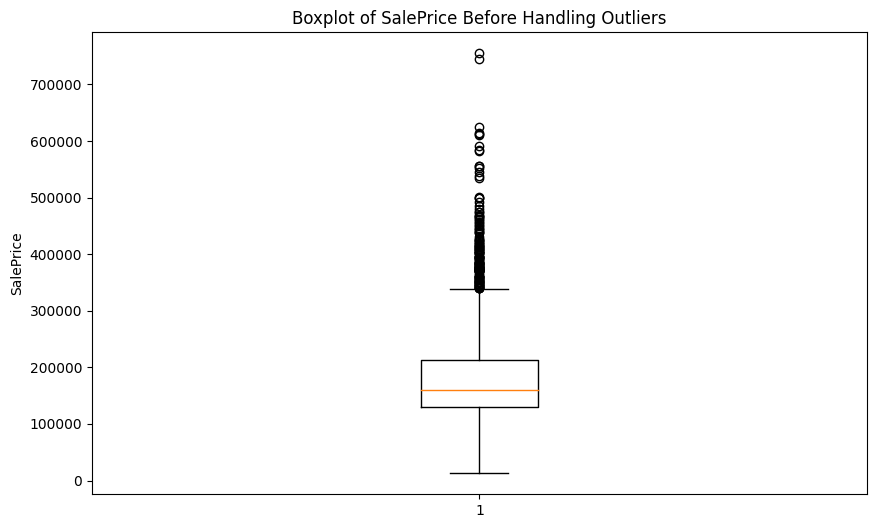

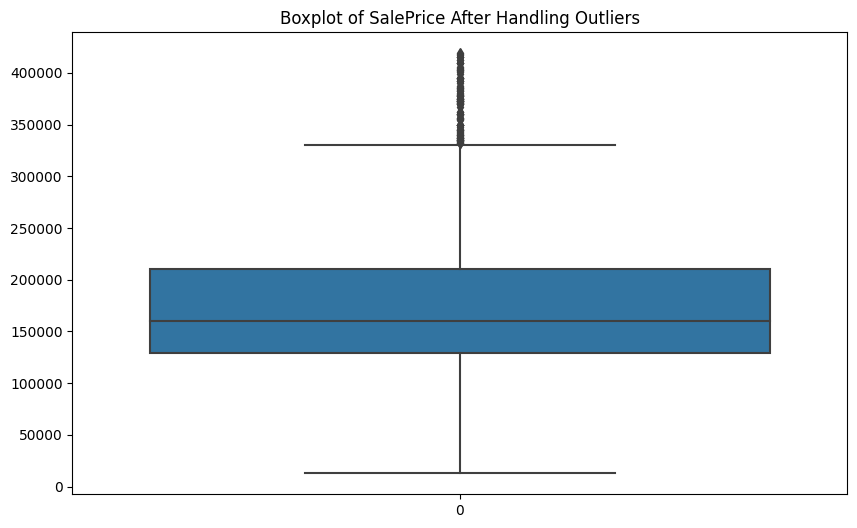

In [98]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['SalePrice'])
plt.title('Boxplot of SalePrice Before Handling Outliers')
plt.ylabel('SalePrice')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(df_cleaned_z['SalePrice'])
plt.title('Boxplot of SalePrice After Handling Outliers')
plt.show()

# 12. Correlation Analysis
**Create and analyze a correlation matrix to understand relationships between features and the target variable (SalePrice).******


In [99]:
numerical_df = drop_columns.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
numerical_df.corr()


,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.011797,-0.006461,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
MS SubClass,0.011797,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.006461,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.204103,0.200013,...,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921,0.340751
Lot Area,0.031354,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,0.039419,0.198900,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,-0.067349,-0.067383,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,0.036579,0.115688,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,0.043397,0.085744,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,0.002730,0.204103,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.032321,-0.060075,0.200013,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [100]:
df['Yr Sold'] = pd.to_numeric(df['Yr Sold'], errors='coerce')
df['Mo Sold'] = pd.to_numeric(df['Mo Sold'], errors='coerce')
numeric_features = df[['Yr Sold', 'Mo Sold']]
correlation_matrix = numeric_features.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
           Yr Sold   Mo Sold
Yr Sold  1.000000 -0.155554
Mo Sold -0.155554  1.000000


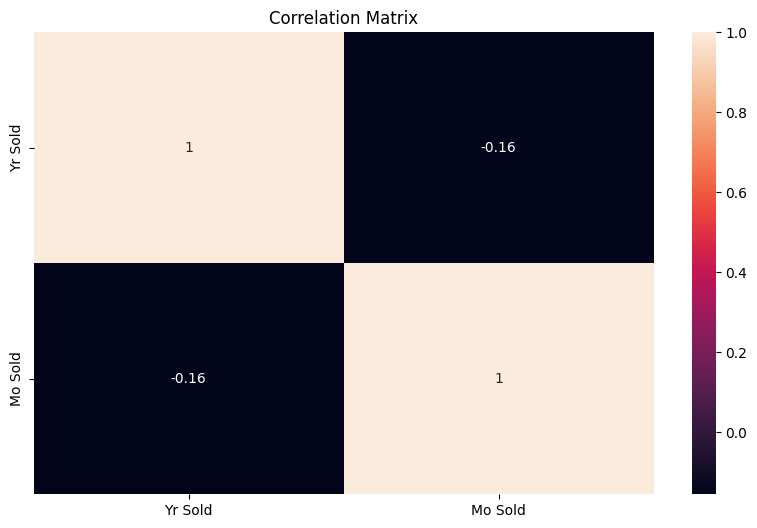

In [101]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# 13. Feature Scaling
**Scale numerical features using techniques like Standardization or Min-Max Scaling.******


In [102]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])



In [103]:
print(df[numerical_features].head())

      Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0 -1.731460 -0.997164    -0.877005      3.366911  2.744381     -0.067254   
1 -1.730277 -0.996904    -0.877005      0.505463  0.187097     -0.776079   
2 -1.729095 -0.996899    -0.877005      0.552372  0.522814     -0.067254   
3 -1.727913 -0.996888    -0.877005      1.115280  0.128458      0.641571   
4 -1.726731 -0.992903     0.061285      0.224010  0.467348     -0.776079   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0     -0.506718   -0.375537       -1.163488      0.056417  ...      0.920121   
1      0.393091   -0.342468       -1.115542     -0.568996  ...      0.366061   
2      0.393091   -0.441674       -1.259380      0.034081  ...      2.368594   
3     -0.506718   -0.110988       -0.779919     -0.568996  ...     -0.742060   
4     -0.506718    0.848000        0.658466     -0.568996  ...      0.935952   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Po

In [104]:
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

In [105]:
print(df[numerical_features].head())

      Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0  0.000000  0.000000     0.000000      0.410959  0.142420      0.555556   
1  0.000341  0.000102     0.000000      0.202055  0.048246      0.444444   
2  0.000683  0.000104     0.000000      0.205479  0.060609      0.555556   
3  0.001024  0.000108     0.000000      0.246575  0.046087      0.666667   
4  0.001366  0.001672     0.235294      0.181507  0.058566      0.444444   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  Wood Deck SF  \
0         0.500    0.637681        0.166667        0.0700  ...      0.147472   
1         0.625    0.644928        0.183333        0.0000  ...      0.098315   
2         0.625    0.623188        0.133333        0.0675  ...      0.275983   
3         0.500    0.695652        0.300000        0.0000  ...      0.000000   
4         0.500    0.905797        0.800000        0.0000  ...      0.148876   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Po

# 15. Feature Encoding
**Encode categorical variables using One-Hot Encoding or Label Encoding.******

In [106]:
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.000000,0.000000,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.07000,...,False,False,False,False,True,False,False,False,True,False
1,0.000341,0.000102,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,...,False,False,False,False,True,False,False,False,True,False
2,0.000683,0.000104,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,...,False,False,False,False,True,False,False,False,True,False
3,0.001024,0.000108,0.000000,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.00000,...,False,False,False,False,True,False,False,False,True,False
4,0.001366,0.001672,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.998634,0.825655,0.352941,0.054795,0.031022,0.555556,0.625,0.811594,0.566667,0.00000,...,False,False,False,False,True,False,False,False,True,False
2926,0.998976,0.825657,0.000000,0.165153,0.035453,0.444444,0.500,0.804348,0.550000,0.00000,...,False,False,False,False,True,False,False,False,True,False
2927,0.999317,0.825915,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,...,False,False,False,False,True,False,False,False,True,False
2928,0.999659,0.827371,0.000000,0.191781,0.040711,0.444444,0.500,0.739130,0.416667,0.00000,...,False,False,False,False,True,False,False,False,True,False


# 16. Data Visualization
**Create visualizations (scatter plots, histograms, boxplots, etc.) to explore the relationships between key features and SalePrice.******


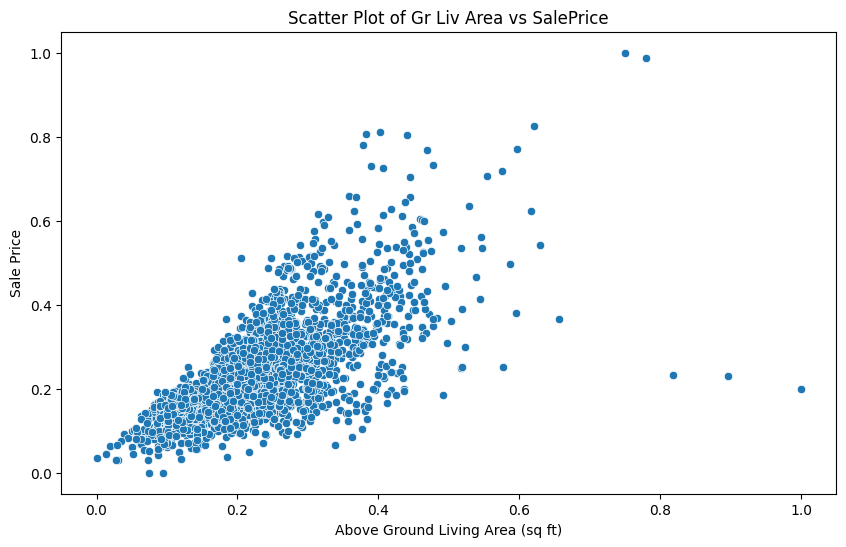

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.title('Scatter Plot of Gr Liv Area vs SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Overall Qual', y='SalePrice')
plt.title('Boxplot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# 18. Build a Regression Model
**Build a regression model (e.g., Linear Regression, Decision Trees, Random Forest) to predict SalePrice.******

In [ ]:
df = pd.get_dummies(df, drop_first=True)  
df.fillna(df.median(), inplace=True)      
print(df.dtypes)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

# 19. Evaluate the Model
**Evaluate the model using metrics like RMSE, R-squared, and perform cross-validation.******

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error:',mae )